## EE 461P: Data Science Principles  
### Assignment 1  
### Total points: 75
### Due: Tuesday, January 31, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Reece Riherd, rdr2793
2. (if applicable).

# Question 1 (5 points)

Read [this](https://www.covid-datascience.com/post/israeli-data-how-can-efficacy-vs-severe-disease-be-strong-when-60-of-hospitalized-are-vaccinated) article that talks about the possibility of vaccines being uneffective in Israel since nearly 60% of severe COVID-19 hospitalization in Israel were vaccinated people. Use Simpson's Paradox to briefly explain if this claim holds true.


# Answer 1

When applying Simpson's Paradox to the claim that vaccines are ineffective in Israel, the claim is refuted by the reversal of the trend when data among specific age groups is compared. Although vaccines only show 67.5% efficacy when analyzed with every age group, efffectiveness is consistently shown in the range of 88.7% and 100% for most age groups when analyzed individually. This in combination with factors that influence the disparity of severe Covid cases like age disparity, high rates of vaccination, and a higher likelihood to vaccinate in older generations creates confusion in the interpretation of the data. The apparency of the effectiveness of vaccination is diminished by these external factors, but when these factors are separated (such as by age groups), the effectiveness of vaccination is obvious, thus showing a clear example of Simpson's Paradox.

# Question 2 (10 points)

100 students in the previous offering of this class were asked if they wanted to form their own groups for the course project or have the instructor randomize the groups. They reported their preferences by entering Yes or No in the survey. We use 0 to represent preferring their own groups and 1 to represent randomized groups. A random sample of 20 students yielded the following preferences:

$$1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1$$

These choices are assumed to arise by independent and identically distributed (i.i.d.) sampling from the following distribution and if the unknown parameter $q$ can be estimated, then we can provide more insights about the students' preference regrading the project groups.

$$
\begin{equation}
\nonumber P(x) = \left\{
\begin{array}{l l}
    q& \quad \text{for  } x=0\\
1-q & \quad \text{for } x=1
\end{array} \right.
\end{equation}
$$

Based on the definitions given above, identify the likelihood function and derive the **maximum likelihood estimator** of $q$. Using the given sample, find a maximum likelihood estimate of $q$ as well.

# Answer 2

# Question 3 (5+5 points)

a) Briefly explain what you understand by an estimator of a numeric quantity being unbiased? Show that the MLE for the variance of a Gaussian is biased.

b) Suppose the mean of the Gaussian distribution, $\mu$. So given a data set assumed to be obtained by sampling i.i.d from this Gaussian, your job is to obtain the MLE for the unknown variance. Derive the equation for this estimate and show that it is unbiased.

# Answer 3


a.)

b.)

# Question 4 (5+5 points)

a) What is multicollinearity in the context of linear regression and why is it problematic?

b) How do you diagnose and fix multicollinearity?


# Answer 4

a.)
Multicollinearity occurs when multiple features of a regression model are correlated with each other, or when those variables are linearly related. This is problematic because multicollinearity makes the results of the model difficult to interpret since they could have been a result of multiple features either individually or together. It can also cause an unstable model that varies significantly given small changes in the data or model, and can result in overfitting, or a decrease in accuracy when applied to another set of data.

b.)
It is possible to detect multicollinearity through the correlation matrix of independent variables. Independent values that are highly correlated with each other in this matrix could be a cause for multicollinearity.

Then, to fix the isue of multicollinearity, the variables which more significantly effect the output of the model can be isolated to reduce the effects of multicollinearity. Then, if the problem still persists, variable transformation could reduce the correlation of the features with each other by changing the presentation or range of the data (for example removing the any data taken from the current month).

# Question 5 : Regression (40 points)


### 5.1 Generate Data (5 points)
Generate a synthetic regression dataset using make_regression from [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) with the following characteristics :
n_samples = 20000, n_features = 20, n_informative = 15, n_targets = 1, coef = True and random_state = 42, bias = True, noise = 0.1.

**Reading Assignment** : Read about how this data is generated and the affect of the above mentioned parameters on the data. 

In [2]:
import pandas as pd
from matplotlib import pyplot
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


x,y,coef = make_regression(n_samples=20000, n_features=20, n_informative=15, n_targets=1, bias=True, noise=0.1, coef=True, random_state=42)

# pyplot.scatter(x,y)
# pyplot.show()

### 5.2 Perform Regression (10 points)
a) Divide the above obtained data into a train/test split by using 20% of the data for testing. Then train a linear regression model using Ordinary Least Squares method from [sklearn](https://scikit-learn.org/stable/modules/linear_model.html). 

b) Evaluate the trained model using Mean Squared Error on both train and test datasets and report the performance. 

c) Also, print the coefficients and bias obtained after the fit and compare them with the coefficients and bias that were used for generating the data in 5.1. 

In [3]:
# a.)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
# print(len(x_train))
# print(len(y_train))

# result = sm.OLS(y_train, x_train).fit()
# print(result)
# print(result.summary())

model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

In [4]:
# b.)
y_pred = model.predict(x_test)
y_pred2 = model.predict(x_train)


print("Mean squared error of test: %f" % mean_squared_error(y_test, y_pred))
print("Mean squared error of train: %f" % mean_squared_error(y_train, y_pred2))

Mean squared error of test: 0.010471
Mean squared error of train: 0.009975


In [5]:
# c.)
print("Coefficients when generating data: \n", coef)
print("Coefficients after fitting the data: \n", model.coef_)
print("Bias when generating the data was True, or 1.")
print("Bias after fitting the data was", model.intercept_)

Coefficients when generating data: 
 [49.75788258 90.83665798 25.02841944  0.          4.60361603 30.85350704
  0.         93.84635499 56.30241747 65.6311587  17.00530636  0.
 31.35960057  0.         60.7651503  54.96244433 28.80887553  0.
 87.80872023 96.00842932]
Coefficients after fitting the data: 
 [ 4.97568103e+01  9.08349608e+01  2.50288380e+01 -5.34098116e-05
  4.60368487e+00  3.08548793e+01  9.58574094e-04  9.38474589e+01
  5.63027054e+01  6.56306844e+01  1.70049794e+01  1.37272463e-03
  3.13598926e+01  7.87077400e-04  6.07646643e+01  5.49635451e+01
  2.88097930e+01  1.50933877e-04  8.78089100e+01  9.60072744e+01]
Bias when generating the data was True, or 1.
Bias after fitting the data was 0.9995602406110253


### 5.3 Residuals (5 points)
a) Compute the residuals (difference between predicted and original values)  of the trained model on the test data. Compute and show the mean and variance of the residuals. 

b) Scatter plot the residuals along with true predictions and observe how are the residuals distributed.

(BONUS) How do the above observations relate to one of the asumptions behind the MLR model? (5 points)

In [6]:
# a.)

residuals = y_test - y_pred
mean = np.mean(np.abs(residuals))
variance = np.var(np.abs(residuals))
print("mean is", mean)
print("variance is", variance)

mean is 0.08195903246928546
variance is 0.003754117994819662


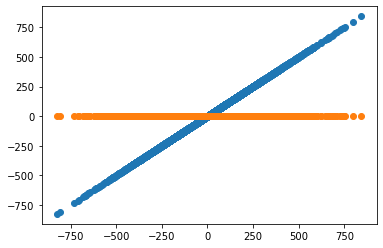

In [7]:
# b.)
# I don't know if this is right? Should we be plotting against x?
pyplot.scatter(y_test, y_pred)
pyplot.scatter(y_test, residuals)
pyplot.show()

In [8]:
# Bonus

### 5.4 Lasso and Ridge Regression (10 points)

a) Run Lasso and Ridge regression on the data generated in 5.1 by varying the parameter alpha from 10^-3 to 10^3. For each value of the alpha, store the train error (MSE), test error (MSE), and norm of the coefficient vector using [numpy.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

b) Plot the train error, test error and the norm of the coefficient vector with increasing alpha and note what you observe. Use one plot for train error and test error and another for the norm.


In [27]:
# a.)
alpha = []
ridge_trainMSE = []
ridge_testMSE = []
lasso_trainMSE = []
lasso_testMSE = []

rcoefficient_norm = []
lcoefficient_norm = []
x = -3
while x < 3:
    alpha.append(x)

    ridge = Ridge(alpha=10**x, normalize=True)
    ridge.fit(x_train, y_train)
    ridge_pred = ridge.predict(x_test)
    ridge_pred1 = ridge.predict(x_train)
    # print(ridge_pred)
    ridge_trainMSE.append(mean_squared_error(ridge_pred1, y_train)) # print("ridge training error is", mean_squared_error(ridge_pred1, y_train))
    ridge_testMSE.append(mean_squared_error(ridge_pred, y_test)) # print("ridge testing error is", mean_squared_error(ridge_pred, y_test))

    rcoefficient_norm.append(np.linalg.norm(ridge.coef_))
    #print("ridge train error is", mean_squared_error(ridge_pred, y_pred)))

    lasso = Lasso(alpha=10**x, normalize=True)
    lasso.fit(x_train, y_train)
    lasso_pred = lasso.predict(x_test)
    lasso_pred1 = lasso.predict(x_train)

    lasso_trainMSE.append(mean_squared_error(lasso_pred1, y_train))
    lasso_testMSE.append(mean_squared_error(lasso_pred, y_test))

    # print("lasso training error is", mean_squared_error(lasso_pred1, y_train))
    # print("lasso testing error is", mean_squared_error(lasso_pred, y_test))

    lcoefficient_norm.append(np.linalg.norm(lasso.coef_))
    x = x + 0.01




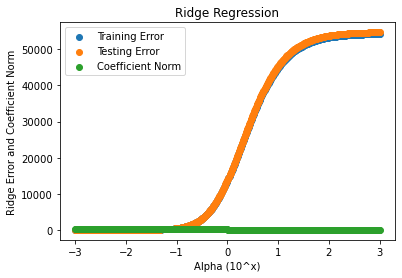

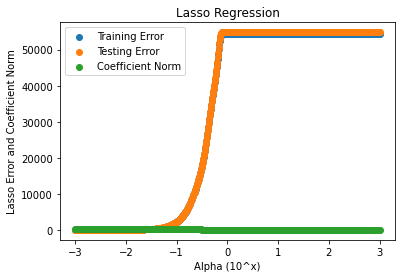

In [30]:
# b.)

pyplot.scatter(alpha, ridge_trainMSE, label="Training Error")
pyplot.scatter(alpha, ridge_testMSE, label="Testing Error")
pyplot.scatter(alpha, rcoefficient_norm, label="Coefficient Norm")
pyplot.legend(loc="upper left")
pyplot.title("Ridge Regression")
pyplot.xlabel("Alpha (10^x)")
pyplot.ylabel("Ridge Error and Coefficient Norm")
pyplot.show()

pyplot.scatter(alpha, lasso_trainMSE, label="Training Error")
pyplot.scatter(alpha, lasso_testMSE, label="Testing Error")
pyplot.scatter(alpha, lcoefficient_norm, label="Coefficient Norm")
pyplot.legend(loc="upper left")
pyplot.title("Lasso Regression")
pyplot.xlabel("Alpha (10^x)")
pyplot.ylabel("Lasso Error and Coefficient Norm")
pyplot.show()

### 5.5 Real-world Regression Problem (10 points)

The dataset in the file ecommerce_dataset.csv is for an ecommerce business trying to predict the annual amount spent by each customer. Use Lasso and Ridge regression on the set of independent variables {Average Session Length, Time on App, Time on Website, Length of Membership}  to predict the dependent variable **Yearly Amount Spent**. Vary the value of alpha in the range 10^-6 to 10^5 and do 5-fold cross-validation using sklearn's KFold to find the value of alpha that gives best performance as measured using MSE.